# Build a perceptron

<div id="content"><ol>
<li><p>Randomly initialize the weights ($w_1,w_2,w_3,...,w_n$) and bias b</p></li>
<li><p>Select one input $\large (x_1,x_2,x_3,...,x_n)$ and output (y) pair at random. </p></li>
<li><p>Present the values $\large (x_1,x_2,x_3,...,x_n)$ to the perceptron to compute the output $\large y = f(z)$,  $\large z = \sum_{n}^{i=0}W_i X_i + b$, and $\large f(z) = \begin{cases} -1, & z<0 \\1, & z \geq0 \end{cases}$</p></li>
<li><p>If the output y is different from the ground truth for this input/output pair, adjust the weights in the following way:</p>
<p>a. If y &lt; 0, add $η\times xi$ to each $w_i$.</p>
<p>b. If y &gt; 0, subtract $η\times xi$ from each $w_i$.</p></li>
<li><p>Repeat steps 2, 3, and 4 until the perceptron predicts all examples correctly.</p></li>
</ol></div>

[-1.0, 1.0, -1.0, 1.0]


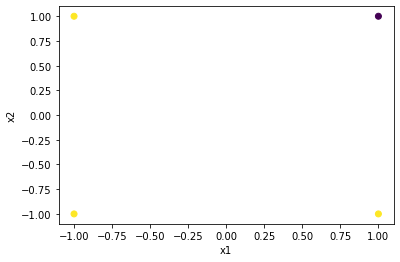

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Generate some random data for x1, x2,x3 and y
#X has three predictor variables, and there are three samples
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
    (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # Inputs
y_train = [1.0, 1.0, 1.0, -1.0] # Output (ground truth)
x_train1 = np.rot90(np.array(x_train)).tolist()
print(x_train1[0])
# Create a scatter plot
plt.scatter(x_train1[0], x_train1[1], c=y_train)

# Set the x and y axis labels
plt.xlabel('x1')
plt.ylabel('x2')

# Show the plot
plt.show()

In [ ]:
import random

def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])

# Define variables needed to control training process.
random.seed(7) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] # Used to randomize order

# Define training examples.
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
    (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # Inputs
y_train = [1.0, 1.0, 1.0, -1.0] # Output (ground truth)

# Define perceptron weights.
w = [0.2, -0.6, 0.25] # Initialize to some “random” numbers

# Print initial weights.
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # Compute sum of weighted inputs
    if z < 0: # Apply sign function
        return -1
    else:
        return 1
# Perceptron training loop.
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) # Randomize order
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) # Perceptron function

        if y != p_out: # Update weights when wrong
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w) # Show updated weights

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


# Use a perceptron from Scikit Learn to perform a classification

## About the Iris data set: 
this data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)



Perceptron(random_state=42)

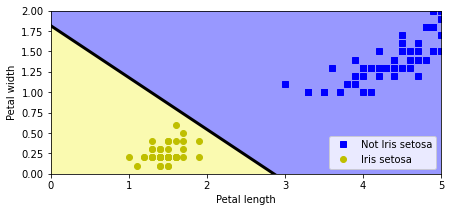

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

In [ ]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
print(y_pred)

[ True False]


# Using a MLP to predict California house price

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [ ]:
rmse

0.5053326657968679

# Using MLP for iris classication

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

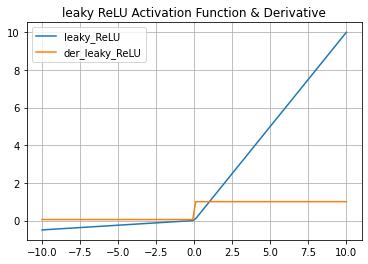

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky Rectified Linear Unit (leaky ReLU) Activation Function
def leaky_ReLU(x):
  data = [max(0.05*value,value) for value in x]
  return np.array(data, dtype=float)

# Derivative for leaky ReLU 
def der_leaky_ReLU(x):
  data = [1 if value>0 else 0.05 for value in x]
  return np.array(data, dtype=float)

# Generating data For Graph
x_data = np.linspace(-10,10,100)
y_data = leaky_ReLU(x_data)
dy_data = der_leaky_ReLU(x_data)

# Graph
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('leaky ReLU Activation Function & Derivative')
plt.legend(['leaky_ReLU','der_leaky_ReLU'])
plt.grid()
plt.show()

## Using keras to build an MLP

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

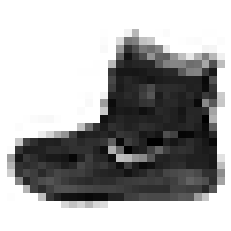

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]


'Ankle boot'

In [ ]:
import os
import matplotlib.pyplot as plt

# Where to save the figures


def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Saving figure ./fashion_mnist_images_plot


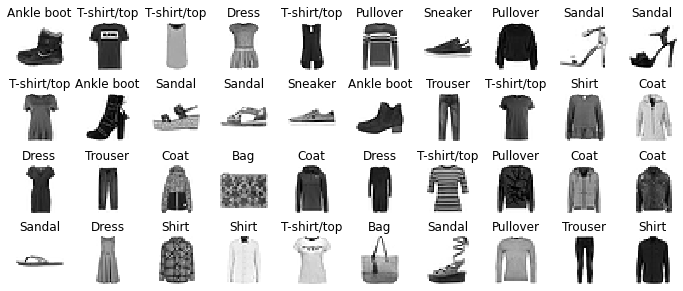

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('./fashion_mnist_images_plot', tight_layout=False)

plt.show()

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 14s 7ms/step - loss: 8.6141 - root_mean_squared_error: 2.9350 - val_loss: 8.4200 - val_root_mean_squared_error: 2.9019
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.3020 - root_mean_squared_error: 2.8813 - val_loss: 8.3921 - val_root_mean_squared_error: 2.8971
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.2860 - root_mean_squared_error: 2.8786 - val_loss: 8.4249 - val_root_mean_squared_error: 2.9027
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.2794 - root_mean_squared_error: 2.8774 - val_loss: 8.4382 - val_root_mean_squared_error: 2.9050
Epoch 5/20
1719/1719 [==============================] - 13s 7ms/step - loss: 8.2720 - root_mean_squared_error: 2.8761 - val_loss: 8.3909 - val_root_mean_squared_error: 2.8969
Epoch 6/20
1719/1719 [==============================] - 12s 7ms/step - loss: 8.2635 - root_mean_squared_error: 2.8747 - val_l

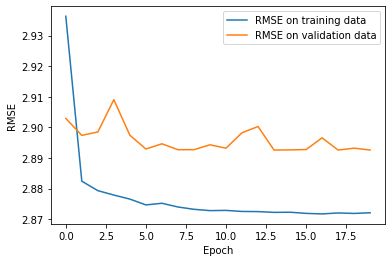

In [ ]:
# Plot the learning curves
plt.plot(history.history['root_mean_squared_error'], label='RMSE on training data')
plt.plot(history.history['val_root_mean_squared_error'], label='RMSE on validation data')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

1/1 [==============================] - 0s 24ms/step
Saving figure fashion_mnist_images_plot


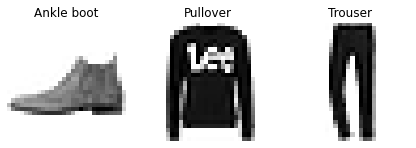

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = y_proba.argmax(axis=-1)
y_pred
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Use a Keras model to do land use  land cover classification

## read the training dataset
Download the csv file from here and upload it to your colab workspace
https://drive.google.com/file/d/1L-OtACGQSoE_fY72zVgAF4i5xj48F_za/view?usp=share_link






## Build a 4-layer perceptron

### Define and compile the model

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('all_samples.csv')
x = data[['b1_ls8', 'b2_ls8', 'b3_ls8','b4_ls8','b5_ls8','b6_ls8','b7_ls8']].to_numpy()
y = data['Classvalue'].to_numpy()

# Convert y to one-hot encoding
y = data['Classvalue']
le = LabelEncoder()

# Fit and transform y to integer labels
y_encoded = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y_encoded,num_classes = 7)
normLayer = tf.keras.layers.Normalization(input_shape = x.shape[1:])

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

opt_adm = tf.keras.optimizers.Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                256       
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 7)                 231       
                                                                 
Total params: 1,543
Trainable params: 1,543
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Train the model

In [ ]:
history = model.fit(x, y, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
306/306 [==============================] - 3s 5ms/step - loss: 1.3198 - accuracy: 0.5309 - val_loss: 2.7988 - val_accuracy: 0.2362
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.9639 - accuracy: 0.6470 - val_loss: 3.0815 - val_accuracy: 0.2362
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.8415 - accuracy: 0.7246 - val_loss: 2.9110 - val_accuracy: 0.2365
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7629 - accuracy: 0.7549 - val_loss: 2.6975 - val_accuracy: 0.2365
Epoch 5/50
306/306 [==============================] - 2s 6ms/step - loss: 0.7021 - accuracy: 0.7809 - val_loss: 2.4267 - val_accuracy: 0.2367
Epoch 6/50
306/306 [==============================] - 2s 5ms/step - loss: 0.6511 - accuracy: 0.7911 - val_loss: 1.9260 - val_accuracy: 0.2367
Epoch 7/50
306/306 [==============================] - 2s 5ms/step - loss: 0.6134 - accuracy: 0.7962 - val_loss: 1.5138 - val_accuracy: 0.4178
Epoch 

### plot the learning curves

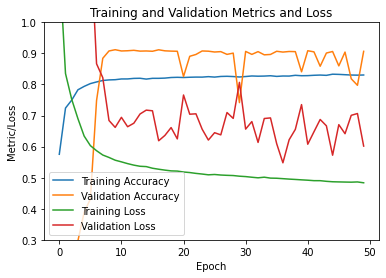

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add a title and labels to the plot
plt.title('Training and Validation Metrics and Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric/Loss')
plt.ylim([0.3, 1])
# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

### Add some dropouts

In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x, y, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
393/393 [==============================] - 2s 3ms/step - loss: 1.4450 - accuracy: 0.4764 - val_loss: 0.4572 - val_accuracy: 0.9936
Epoch 2/50
393/393 [==============================] - 1s 2ms/step - loss: 1.0308 - accuracy: 0.6291 - val_loss: 0.2742 - val_accuracy: 0.9900
Epoch 3/50
393/393 [==============================] - 1s 2ms/step - loss: 0.8709 - accuracy: 0.6966 - val_loss: 0.2340 - val_accuracy: 0.9778
Epoch 4/50
393/393 [==============================] - 1s 2ms/step - loss: 0.7964 - accuracy: 0.7354 - val_loss: 0.2222 - val_accuracy: 0.9764
Epoch 5/50
393/393 [==============================] - 1s 3ms/step - loss: 0.7445 - accuracy: 0.7541 - val_loss: 0.2199 - val_accuracy: 0.9764
Epoch 6/50
393/393 [==============================] - 1s 3ms/step - loss: 0.7215 - accuracy: 0.7674 - val_loss: 0.2139 - val_accuracy: 0.9792
Epoch 7/50
393/393 [==============================] - 1s 3ms/step - loss: 0.6991 - accuracy: 0.7746 - val_loss: 0.2106 - val_accuracy: 0.9771
Epoch 

## Train an SVM model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the CSV file
data = pd.read_csv('all_samples.csv')

# Split the data into features (X) and target (y)
X = data[['b1_ls8', 'b2_ls8', 'b3_ls8','b4_ls8','b5_ls8','b6_ls8','b7_ls8']]
y = data['Classvalue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the SVM model
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8661417322834646


## Train a random forest model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file
data = pd.read_csv('all_samples.csv')

# Split the data into features (X) and target (y)
X = data[['b1_ls8', 'b2_ls8', 'b3_ls8','b4_ls8','b5_ls8','b6_ls8','b7_ls8']]
y = data['Classvalue']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8869005010737294


## Train a maximum likelihood classification model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#  Load the CSV file
data = pd.read_csv('all_samples.csv')

# Split the data into features (X) and target (y)
X = data[['b1_ls8', 'b2_ls8', 'b3_ls8','b4_ls8','b5_ls8','b6_ls8','b7_ls8']]
y = data['Classvalue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Maximum Likelihood Classification model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6628489620615605
